<h2>Analyse de la qualité de l'air à l'aide d'une régression multivariée</h2>

<h4>Introduction : </h4>
<p>Ici, nous essayons d'identifier s'il existe une relation linéaire entre la température et l'humidité (variables indépendantes) et la qualité de l'air (variable dépendante).</p>

<h4>Data set :</h4> <p>l'ensemble de données a été collecté à partir de la plateforme ThingSpeak, il représente les valeurs capturées par les capteurs sur une période de temps dans un environnement intérieur.</p>

In [1]:
import csv
import pandas as pd 
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt


r_cols = ['time', 'id', '']
data_set = pd.read_csv('C:\\Users\\HAITAM\\Downloads\\feeds.csv')

#deleting unwanted colomuns
data_set.drop(['entry_id', 'latitude','longitude','elevation','status'], axis=1, inplace=True)

#renaming columns
data_set.rename(columns={'created_at':'time','field1':'air quality','field2':'temperature','field3':'humidity'},inplace=True)
data_set



,time,air quality,temperature,humidity
0,2020-03-18 12:58:01 CET,NaN,19.9,NaN
1,2020-03-18 12:58:19 CET,NaN,20.0,NaN
2,2020-03-18 12:58:39 CET,NaN,NaN,55.4
3,2020-03-18 12:58:54 CET,3.09220,NaN,NaN
4,2020-03-18 12:59:09 CET,NaN,20.0,NaN
5,2020-03-18 12:59:26 CET,NaN,20.0,NaN
6,2020-03-18 12:59:41 CET,NaN,NaN,55.3
7,2020-03-18 12:59:56 CET,NaN,20.0,NaN
8,2020-03-18 13:00:12 CET,NaN,20.0,NaN
9,2020-03-18 13:00:27 CET,NaN,NaN,55.2


<h4>Gérer les données manquantes :</h4>
<p>Comme vous pouvez le voir, certaines valeurs manquent, et cela s'explique par le délai entre la capture de la valeur et son envoi à la plate-forme, en plus de cela, les capteurs capturent les données à différents intervalles de temps.</p>

<p><b>Solution:</b>la méthode que nous allons utiliser pour remplir les valeurs manquantes est la fonction d'interpolation fournie dans le package pandas, qui utilise diverses techniques d'interpolation pour remplir les valeurs manquantes.</p>

In [3]:
#check for null values (nan)
data_set.isnull()
#apply the interpolate function to fill in the missing values
data_set=data_set.interpolate(method ='linear', limit_direction ='forward') 
data_set=data_set.drop(0)
data_set=data_set.drop(1)
data_set=data_set.drop(2)
#data_set.dropna()
data_set


,time,air quality,temperature,humidity
3,2020-03-18 12:58:54 CET,3.092200,20.000000,55.375000
4,2020-03-18 12:59:09 CET,3.097590,20.000000,55.350000
5,2020-03-18 12:59:26 CET,3.102980,20.000000,55.325000
6,2020-03-18 12:59:41 CET,3.108370,20.000000,55.300000
7,2020-03-18 12:59:56 CET,3.113760,20.000000,55.266667
8,2020-03-18 13:00:12 CET,3.119150,20.000000,55.233333
9,2020-03-18 13:00:27 CET,3.124540,20.033333,55.200000
10,2020-03-18 13:00:45 CET,3.129930,20.066667,55.166667
11,2020-03-18 13:01:01 CET,3.128733,20.100000,55.133333
12,2020-03-18 13:01:18 CET,3.127537,20.100000,55.100000


<h4>Vérification de la linéarité :</h4>

<p>Avant d'exécuter un modèle de régression linéaire, il est conseillé de valider le respect de certaines hypothèses.
Il faut vérifier qu'il existe une relation linéaire entre la variable dépendante et la ou les variables indépendantes.
Dans notre exemple, vous souhaiterez peut-être vérifier qu'une relation linéaire existe entre:
<li>
<b>Dependant variables:</b> Temperature et Humidité.
</li>
<li>
<b>Independant variables:</b> Qualité de l'air.
</li>

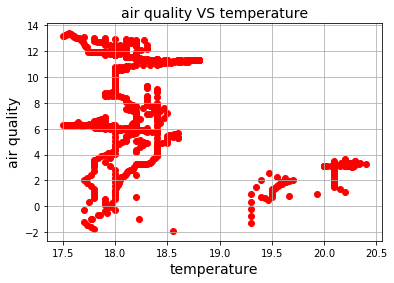

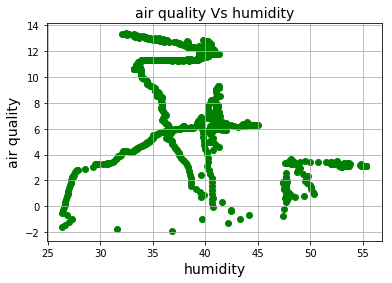

In [4]:
plt.scatter(data_set['temperature'], data_set['air quality'], color='red')
plt.title('air quality VS temperature', fontsize=14)
plt.xlabel('temperature', fontsize=14)
plt.ylabel('air quality', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(data_set['humidity'], data_set['air quality'], color='green')
plt.title('air quality Vs humidity', fontsize=14)
plt.xlabel('humidity', fontsize=14)
plt.ylabel('air quality', fontsize=14)
plt.grid(True)
plt.show()

In [7]:


X = data_set[['temperature','humidity']] 
Y = data_set['air quality']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Temperature = 20
New_Humidity = 50
print ('Predicted air quality: \n', regr.predict([[New_Temperature ,New_Humidity]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


Intercept: 
 51.140767148133165
Coefficients: 
 [-2.3799992e+00  2.3206246e-03]
Predicted air quality: 
 [3.65681432]
                            OLS Regression Results                            
Dep. Variable:            air quality   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     97.28
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           7.08e-39
Time:                        21:45:51   Log-Likelihood:                -2363.7
No. Observations:                 878   AIC:                             4733.
Df Residuals:                     875   BIC:                             4748.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------

C:\Users\HAITAM\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
